In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [31]:
import os
datasets=os.listdir("C:\\Users\\kavin\\OneDrive\\Desktop\\datatata")
data=[]
c=input()
c=c.upper()
c=list(c)
for i in range(len(c)):
    if c[i]==' ':
        c[i]='_'
c=''.join(c)
d=c+"__EQ__INDICES__NSE__MINUTE.csv"
c=c+"__EQ__NSE__NSE__MINUTE.csv"
found=0
for i in datasets:
    if i==c:
        found=1
        break
    elif i==d:
        found=1
        c=d
        break
        
if found:
    path="C:\\Users\\kavin\\OneDrive\\Desktop\\datatata\\"+c
    dataset=pd.read_csv(path)
    dataset['timestamp']=dataset['timestamp'].astype('string')
    dataset[['Date','Time']] = dataset.timestamp.str.split(" ",expand=True,)
    if len(dataset)<200:
        print("Insufficient Data")
    else:
        dataset=dataset.dropna(how="any",subset=['open','high','volume','close'])
        dataset=dataset.drop_duplicates(keep='last')
        dataset['Date']=pd.to_datetime(dataset['Date'])
        dataset['Time']=dataset['Time'].apply(lambda i:i[:2])
        duration=input("Time duration of prediction ")
        if duration=='Hours':
            reqopen=dataset.groupby(['Date','Time'])['open'].apply(list).apply(lambda x:x[0])
            reqclose=dataset.groupby(['Date','Time'])['close'].apply(list).apply(lambda x: x[-1])
            reqhigh=dataset.groupby(['Date','Time'])['high'].max()
            reqlow=dataset.groupby(['Date','Time'])['low'].min()
            hropen=[]
            hrclose=[]
            hrhigh=[]
            hrlow=[]
            for k in range(len(reqopen)):
                hropen.append(reqopen[k])
                hrclose.append(reqclose[k])
                hrhigh.append(reqhigh[k])
                hrlow.append(reqlow[k])
            hrdata={'open':hropen,'close':hrclose,'high':hrhigh,'low':hrlow}
            HrData=pd.DataFrame(hrdata)
            dataset=HrData
dataset
        

Tcs
Time duration of prediction 


,timestamp,open,high,low,close,volume,Date,Time
0,2017-01-02 09:15:00+05:30,1183.50,1185.50,1180.25,1183.50,8970.0,2017-01-02,09
1,2017-01-02 09:16:00+05:30,1183.50,1184.50,1180.85,1182.48,5538.0,2017-01-02,09
2,2017-01-02 09:17:00+05:30,1182.50,1182.50,1181.43,1181.68,1366.0,2017-01-02,09
3,2017-01-02 09:18:00+05:30,1181.68,1185.80,1181.48,1185.80,1640.0,2017-01-02,09
4,2017-01-02 09:19:00+05:30,1185.80,1185.80,1182.00,1183.25,3486.0,2017-01-02,09
...,...,...,...,...,...,...,...,...
310481,2020-05-15 15:25:00+05:30,1901.00,1905.00,1899.50,1904.70,11327.0,2020-05-15,15
310482,2020-05-15 15:26:00+05:30,1904.70,1904.85,1902.50,1904.00,13608.0,2020-05-15,15
310483,2020-05-15 15:27:00+05:30,1904.00,1904.30,1902.55,1903.15,17151.0,2020-05-15,15
310484,2020-05-15 15:28:00+05:30,1903.15,1908.95,1902.20,1903.25,15520.0,2020-05-15,15


In [35]:
#Independent Variable and Dependent Variable 
x1 = dataset.iloc[:,2:5].values 
y1 = dataset.iloc[:, 1].values

In [36]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)


In [37]:
# # Fitting Multiple Linear Regression to the Training set on open
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Predicting the Test set results 
y_pred = regressor.predict(x_test)

In [39]:
k=list(y_test-y_pred)
len(k)

62070

In [40]:
# accuracy metrics 
from sklearn.metrics import mean_squared_error,r2_score 
rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) 
r2score = r2_score(y_test, y_pred)

In [41]:
print(rmse) 
print(r2score)

0.6973515502110034
0.9999966708478182


In [18]:
dataset.corr()

,open,high,low,close,volume
open,1.000000,0.999997,0.999996,0.999994,0.051197
high,0.999997,1.000000,0.999994,0.999997,0.052126
low,0.999996,0.999994,1.000000,0.999997,0.050313
close,0.999994,0.999997,0.999997,1.000000,0.051258
volume,0.051197,0.052126,0.050313,0.051258,1.000000


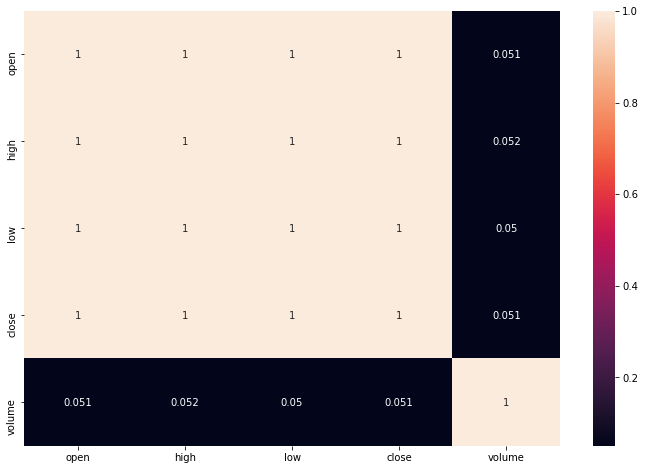

In [26]:
plt.figure(figsize=(12, 8))
k=dataset.corr()
sns.heatmap(k,annot=True)
plt.show()

# for close prediction

In [11]:
# Independent Variable and Dependent Variable 
x2 = dataset.iloc[:,1:4].values 
y2= dataset.iloc[:, 4].values

In [12]:
# Splitting the dataset into the Training set and Test set 
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [13]:
# # Fitting Multiple Linear Regression to the Training set on close
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
# Predicting the Test set results 
y_pred = regressor.predict(x_test)

In [15]:
y_test-y_pred

array([-0.63493989,  0.12484297, -2.61850917, ..., -0.04392805,
        0.28255477,  0.4020428 ])

In [16]:
# accuracy metrics 
from sklearn.metrics import mean_squared_error,r2_score 
rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) 
r2score = r2_score(y_test, y_pred)

In [17]:
print(rmse) 
print(r2score)

0.39194564766325785
0.9999980282160107


# Tkinter GUI

In [42]:
import tkinter as tk 
from tkinter import ttk 
import pickle 
import joblib 
import numpy as np 
import seaborn as sns 
from sklearn.utils import shuffle 
from sklearn.linear_model import LogisticRegression

In [43]:
# Creating a Window
window=tk.Tk() 
tk.mainloop()

In [45]:
# Creating Label widget in window
window=tk.Tk() 
label1=tk.Label(window,text="Hello") 
label1.pack() 
tk.mainloop()

In [48]:
# Creating Entry widget in window
window=tk.Tk() 
x1=tk.StringVar() 
tk.Entry(window,textvariable=x1).pack() 
tk.mainloop() 
print(x1.get())


In [ ]:
# Creating Button widget in window
window=tk.Tk() 
tk.Button(window,text="click",command= lambda : print("Clicked")).pack() 
tk.mainloop()

In [ ]:
# Importing Dataset and printing head 
iris=sns.load_dataset("iris") 
iris.head()


In [ ]:
# unique species 
iris.species.unique()


In [ ]:
# replacing the name of species with number 
num=[] 
for i in iris.species:    
    if i == "setosa":        
        num.append(0)    
    elif i=='versicolor':        
        num.append(1)    
    elif i=='virginica':        
        num.append(2)    
    else:        
        pass 
iris['species_num']=num 
iris.head()

In [ ]:
iris.species_num.unique()

In [ ]:
iris.info()

In [ ]:
# dropping the species name column 
iris.drop('species',axis=1,inplace=True) 
iris.head()

In [ ]:
# shuffling data 
iris=shuffle(iris) 
iris.reset_index(drop=True) 
iris.head()

In [ ]:
# Splitting into train and test 
train=np.array(iris[:120]) 
test=np.array(iris[120:]) 
print(train.shape,test.shape)

In [ ]:
# splitting training and testing in x_train, y_train, x_test and y_test 
x_train,y_train=train[:,:-1],train[:,-1] 
x_test,y_test=test[:,:-1],test[:,-1] 
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [ ]:
# training model 
lr=LogisticRegression() 
lr.fit(X=x_train,y=y_train)

In [ ]:
lr.score(x_test,y_test)

In [ ]:
# Storing using pickle method
Pkl_Filename = "Pickle_Model.pkl" 
with open(Pkl_Filename, 'wb') as file:      
    pickle.dump(lr, file)

In [ ]:
with open(Pkl_Filename, 'rb') as file:      
    Pickled_LR_Model = pickle.load(file) 
Pickled_LR_Model

In [ ]:
Pickled_LR_Model.score(x_test,y_test)

In [ ]:
# Storing using Joblib method
joblib_file = "joblib_Model.pkl"  
joblib.dump(lr, joblib_file)

In [ ]:
joblib_LR_model = joblib.load(joblib_file) 
joblib_LR_model

In [ ]:
joblib_LR_model.score(x_test,y_test)

In [ ]:
path_of_file="" 
path_of_variables="" 
parameters1=["sepal_length","sepal_width","petal_length","petal_width"] 
created_model=1 
type_of_file1="" 
parameter1_values=[]
def find_label(a):    
    if a==0:        
        return "setosa"    
    elif a==1:        
        return 'versicolor'    
    elif a==2:        
        return 'virginica'

def set_path_of_file():    
    global path_of_file    
    path_of_file=x1.get()    
    print(x1.get())

def set_parameter1_values():    
    global parameters1,parameter1_values    
    parameter1_values=list(map(float,x4.get().split(",")))

def set_file():    
    global type_of_file1    
    type_of_file1=x3.get()    
    load_model()
    
def load_model():    
    global created_model,path_of_file,type_of_file1    
    if type_of_file1=="Pickle":        
        with open(path_of_file, 'rb') as fil:              
            model = pickle.load(fil)    
    elif type_of_file1=="Joblib":        
        created_model=joblib.load(path_of_file)

def predict_output():    
    global created_model,parameter1_values    
    output=list(map(find_label,created_model.predict([parameter1_values])))    
    window=tk.Tk()    
    window.geometry('200x200')    
    label=tk.Label(window,text="The output is: "+str(output),font=("Bold",10))    
    label.pack()    
    label.config(wraplength=150)    
    tk.mainloop()    
    
window=tk.Tk() 
window.title("Predictor") 
x1=tk.StringVar() 
x2=tk.StringVar() 
x3=tk.StringVar() 
x4=tk.StringVar() 
tag=tk.StringVar() 
tag.set("  ".join(parameters1))

ttk.Label(window,text="Enter the path of file (.pkl)").grid(row=0,column=0) 
ttk.Entry(window,textvariable=x1).grid(row=0,column=1) 
ttk.Button(window,text="Submit",command=lambda:set_path_of_file()).grid(row=0,column=2)

ttk.Label(window,text="Enter the type of method").grid(row=1,column=0) 
ttk.OptionMenu(window,x3,"Select","Pickle","Joblib").grid(row=1,column=1) 
ttk.Button(window,text="submit",command=lambda : set_file()).grid(row=1,column=2)

ttk.Label(window,text="Enter the values of parameters shown below in the same order, separated by ','" 
ttk.Label(window,text=tag.get()).grid(row=3,column=0,columnspan=3) 
ttk.Entry(window,textvariable=x4).grid(row=4,column=0,columnspan=3) 
ttk.Button(window,text="Submit",command=lambda:set_parameter1_values()).grid(row=5,column=0,columnsp
ttk.Button(window,text="Predict Output",command=lambda : predict_output()).grid(row=6,column=0,colum
tk.mainloop()